In [56]:
class CustomGraph:
    def __init__(self):
        self.matrix_adj = [[]]
        self.matrix_incidence = [[]]
        self.list_adj = {}
        self.list_arc = []
        self.count_vert = 0
        
    def __init__(self, matrix_adj):
        self.matrix_adj = matrix_adj
        self.list_arc_from_matr_adj()
        self.list_adj_from_matix_adj()
        self.matrix_incedent_from_matix_adj()

    def _init_list_adj(self):
        self.list_adj = {}
        for i in range(self.count_vert):
            self.list_adj.update({i: []})

    def matr_adj_from_list_adj(self):
        self.count_vert = len(self.list_adj)
        self.matrix_adj = [[0 for j in range(0, self.count_vert)] for i in range(0, self.count_vert)]
        for i in self.list_adj:
            for j in self.list_adj[i]:
                self.matrix_adj[i][j] = 1

    def matr_adj_from_list_arc(self):
        self.count_vert = max(self.list_arc[0])
        self.matrix_adj = [[0 for j in range(0, self.count_vert)] for i in range(0, self.count_vert)]

        for arc in self.list_arc:
            self.matrix_adj[arc[0]][arc[1]] = 1
            self.matrix_adj[arc[1]][arc[0]] = 1

    def matr_adj_from_matrix_incedent(self):
        self.count_vert = len(self.matrix_incidence)
        self.matrix_adj = [[0] * self.count_vert] * self.count_vert
        t = len(self.matrix_incidence[0])
        first = -1
        second = -1
        for i in range(t):
            for j in range(self.count_vert):
                if self.matrix_incidence[j][i] == 1 and first == -1:
                    first = j
                elif self.matrix_incidence[j][i] == 1 and second == -1:
                    second = 1
                    break
            self.matrix_adj[first][second] = 1
            self.matrix_adj[second][first] = 1

    def list_arc_from_matr_adj(self):
        self.count_vert = len(self.matrix_adj[0])
        self.list_arc = []
        for i in range(self.count_vert):
            for j in range(i + 1, self.count_vert):
                if self.matrix_adj[i][j] > 0:
                    self.list_arc.append([i, j])

    def list_arc_from_matrix_incedent(self):
        self.count_vert = len(self.matrix_incidence)
        count_arc = len(self.matrix_incidence[0])
        first = -1
        second = -1
        for i in range(count_arc):
            for j in range(self.count_vert):
                if self.matrix_incidence[j][i] == 1 and first == -1:
                    first = j
                elif self.matrix_incidence[j][i] == 1 and second == -1:
                    second = 1
                    break
            self.list_arc.append([first, second])

    def list_arc_from_list_adj(self):
        self.count_vert = len(self.list_adj)
        self.list_arc = []
        for i in self.list_adj:
            for j in self.list_adj[i]:
                if i < j:
                    self.list_arc.append([i, j])

    def list_adj_from_list_arc(self):
        self._init_list_adj()
        for arc in self.list_arc:
            self.list_adj.get(arc[0]).append(arc[1])
            self.list_adj.get(arc[1]).append(arc[0])

    def list_adj_from_matix_adj(self):
        self.count_vert = len(self.matrix_adj[0])
        self._init_list_adj()
        for i in range(self.count_vert):
            for j in range(self.count_vert):
                if self.matrix_adj[i][j] > 0:
                    self.list_adj.get(i).append(j)

    def list_adj_from_matrix_incedent(self):
        self.count_vert = len(self.matrix_incidence)
        self._init_list_adj()
        count_arc = len(self.matrix_incidence[0])
        first = -1
        second = -1
        for i in range(count_arc):
            for j in range(self.count_vert):
                if self.matrix_incidence[j][i] == 1 and first == -1:
                    first = j
                elif self.matrix_incidence[j][i] == 1 and second == -1:
                    second = 1
                    break
            self.list_adj.get(first).append(second)
            self.list_adj.get(second).append(first)

    def matrix_incedent_from_matix_adj(self):
        self.count_vert = len(self.matrix_adj[0])
        self.list_arc_from_matr_adj()
        count_arc = len(self.list_arc)
        self.matrix_incidence = [[0 for j in range(0, count_arc)] for i in range(0, self.count_vert)]

        tmp = 0
        for i in range(self.count_vert):
            for j in range(i, self.count_vert):
                if self.matrix_adj[i][j] > 0:
                    print(tmp)
                    print(i)

                    self.matrix_incidence[tmp][i] = 1
                    self.matrix_incidence[tmp][j] = 1
            tmp += 1

    def matrix_incedent_from_list_arc(self):
        if self.count_vert == 0:
            self.count_vert = max(self.list_arc[0])
        count_arc = len(self.list_arc)
        self.matrix_incidence = [[0 for j in range(0, count_arc)] for i in range(0, self.count_vert)]

        for i, arc in enumerate(self.list_arc):
            self.matrix_incidence[arc[0]][i] = 1
            self.matrix_incidence[arc[1]][i] = 1

    def matrix_incedent_from_list_adj(self):
        self.list_arc_from_list_adj()
        self.matrix_incedent_from_list_arc()

    def DFSUtil(self, v, visited):
        visited.add(v)
        for neighbour in self.list_adj[v]:
            if neighbour not in visited:
                print(str(v) + "->" + str(neighbour), end=' ')

                self.DFSUtil(neighbour, visited)
                print(str(neighbour) + '->' + str(v), end=' ')

    def DFS(self, start_vert):
        visited = set()
        self.DFSUtil(start_vert, visited)

    def add_vert(self):
        self.count_vert += 1
        self.list_adj.update({self.count_vert: []})
        self.matrix_incedent_from_list_arc()
        self.list_arc_from_list_adj()
        self.matr_adj_from_list_adj()

    def add_arc(self, vert1, vert2):
        self.list_arc.append([vert1, vert2])
        self.list_adj_from_list_arc()
        self.matr_adj_from_list_adj()
        self.matrix_incedent_from_list_arc()

    def del_arc(self, vert1, vert2):
        try:
            self.list_arc.remove([vert1, vert2])
        except ValueError:
            self.list_arc.remove([vert2, vert1])
        self.list_adj_from_list_arc()
        self.matr_adj_from_list_adj()
        self.matrix_incedent_from_list_arc()

    def del_vert(self, vert):
        del self.list_adj[vert]
        self.count_vert -= 1
        for i in range(self.count_vert):
            try:
                self.list_adj[i].remove(vert)
            except ValueError:
                print(vert, " not in list")
        self.list_arc_from_list_adj()
        print(self.list_adj)
        self.matrix_incedent_from_list_arc()
        self.matr_adj_from_list_adj()
#         if vert == self.count_vert-1:
#             del self.list_adj[vert]
#             self.count_vert -= 1
        
#             self.matrix_incedent_from_list_arc()
#             self.list_arc_from_list_adj()
#             self.matr_adj_from_list_adj()

    def dfs_iterative(self, s):
        visited = [False for i in range(self.count_vert)]
        stack = []
        stack.append(s)

        while len(stack):
            old = s
            s = stack[-1]
            stack.pop()

            if not visited[s]:
                print(str(old) + " -> " + str(s), end=' ')
                visited[s] = True

            for node in self.list_adj[s]:
                if not visited[node]:
                    stack.append(node)

    def kruskal(self):
        MST = set()
        edges = set()
        for j in range(self.count_vert):
            for k in range(self.count_vert):
                if self.matrix_adj[j][k] != 0 and (k, j) not in edges:
                    edges.add((j, k))
        sorted_edges = sorted(edges, key=lambda e: self.matrix_adj[e[0]][e[1]])
        uf = UF(self.count_vert)
        for e in sorted_edges:
            u, v = e
            if uf.connected(u, v):
                continue
            uf.union(u, v)
            MST.add(e)
        return MST


    def dfs_path(self, s):
        self.DFS(s)


class UF:
    def __init__(self, N):
        self._id = [i for i in range(N)]

    def connected(self, p, q):
        return self._find(p) == self._find(q)

    def union(self, p, q):
        p_root = self._find(p)
        q_root = self._find(q)
        if p_root == q_root:
            return
        self._id[p_root] = q_root

    def _find(self, p):
        while p != self._id[p]:
            p = self._id[p]
        return p

0
0
0
0
1
1
vert
vert
vert
vert
arc
3
0
arc
4
1
arc
4
3
arc
5
3
arc
5
2
arc
5
4
arc
6
2
draw


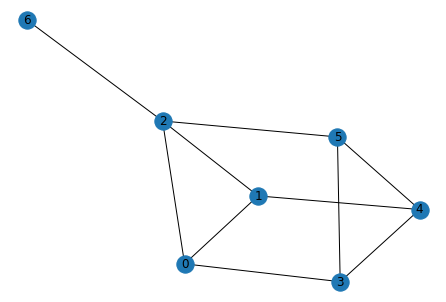

del_vert
6
6  not in list
6  not in list
6  not in list
6  not in list
6  not in list
{0: [1, 2, 3], 1: [0, 2, 4], 2: [0, 1, 5], 3: [0, 4, 5], 4: [1, 3, 5], 5: [3, 2, 4]}
draw


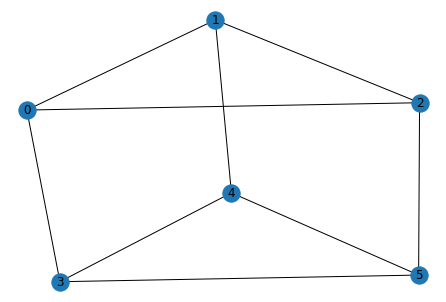

del_arc
1
4
draw


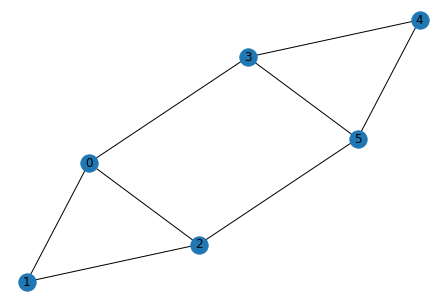

adj_matrix
[0, 1, 1, 1, 0, 0]
[1, 0, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 1]
[1, 0, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 1]
[0, 0, 1, 1, 1, 0]
incedent_matrix
[1, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 0, 1, 1]
adj_list
{0: [1, 2, 3], 1: [0, 2], 2: [0, 1, 5], 3: [0, 4, 5], 4: [3, 5], 5: [2, 3, 4]}
arc_list
[[0, 1], [0, 2], [0, 3], [1, 2], [2, 5], [3, 4], [3, 5], [4, 5]]
dfs
2
2->0 0->1 1->0 0->3 3->4 4->5 5->4 4->3 3->0 0->2 kruskal
{(0, 1), (1, 2), (4, 5), (2, 5), (0, 3)}


In [ ]:
from networkx import draw, Graph
from matplotlib.pylab import show

graph = CustomGraph([[0, 1, 1], [1, 0, 1], [1, 1, 0]])

def _draw():
    g = Graph()
    g.add_edges_from(graph.list_arc)
    draw(g, with_labels=True)
    show()


while True:
    option = input()
    if option == "vert":
        graph.add_vert()
    if option == "arc":
        a = int(input())
        b = int(input())
        graph.add_arc(a, b)
    if option =="draw":
        _draw()
    if option == "adj_matrix":
        for i in graph.matrix_adj:
            print(i)
    if option == "incedent_matrix":
        for i in graph.matrix_incidence:
            print(i)
    if option == "adj_list":
        print(graph.list_adj)
    if option == "arc_list":
        print(graph.list_arc)
    if option == "del_arc":
        a = int(input())
        b = int(input())
        graph.del_arc(a, b)
    if option == "del_vert":
        a = int(input())
        graph.del_vert(a)
    if option == "dfs":
        s = int(input())
        graph.dfs_path(s)
    if option == "kruskal":
        print(graph.kruskal())
    if option == "exit":
        break